# Librerias:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import plotly.express as px
import math
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Importamos el fichero:

In [2]:
df = pd.read_csv(r"../data/datos.csv")

# EDA (exploratory data analysis)

## Análisis general:

Tenemos 15 columnas y 450 filas:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Mood              465 non-null    object 
 1   song_name         465 non-null    object 
 2   song_uri          465 non-null    object 
 3   artist_name       465 non-null    object 
 4   popularity        465 non-null    int64  
 5   danceability      465 non-null    float64
 6   energy            465 non-null    float64
 7   key               465 non-null    int64  
 8   loudness          465 non-null    float64
 9   mode              465 non-null    int64  
 10  speechiness       465 non-null    float64
 11  acousticness      465 non-null    float64
 12  instrumentalness  465 non-null    float64
 13  liveness          465 non-null    float64
 14  valence           465 non-null    float64
 15  tempo             465 non-null    float64
 16  duration_ms       465 non-null    int64  
dt

Como la variable song_uri está al principio y ocupa mucho espacio la muevo al final.

In [4]:
df.columns.get_loc('duration_ms')

16

In [5]:
# Extraer la columna
column_to_move = df.pop('song_uri')

# Insertar la columna en la posición deseada
df.insert(16, 'song_uri', column_to_move)
df

,Mood,song_name,artist_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,song_uri
0,Happy,I'm Good (Blue),David Guetta,95,0.561,0.9650,7,-3.673,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,175238,spotify:track:4uUG5RXrOk84mYEfFvj3cK
1,Happy,I Ain't Worried,OneRepublic,95,0.704,0.7970,0,-5.927,1,0.0475,0.08260,0.000745,0.0546,0.825,139.994,148486,spotify:track:4h9wh7iOZ0GGn8QVp4RAOB
2,Happy,Dance The Night (From Barbie The Album),Dua Lipa,94,0.671,0.8450,11,-4.930,0,0.0480,0.02070,0.000000,0.3290,0.775,110.056,176579,spotify:track:1vYXt7VSjH9JIM5oRRo7vA
3,Happy,Blinding Lights,The Weeknd,94,0.514,0.7300,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,200040,spotify:track:0VjIjW4GlUZAMYd2vXMi3b
4,Happy,Watermelon Sugar,Harry Styles,92,0.548,0.8160,0,-4.209,1,0.0465,0.12200,0.000000,0.3350,0.557,95.390,174000,spotify:track:6UelLqGlWMcVH1E5c4H7lY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,Focus,remembrance,Dreams Ahead,52,0.461,0.0611,0,-20.555,1,0.0440,0.96200,0.930000,0.1120,0.133,120.815,195122,spotify:track:5NFybpngup7caMPSMiJ5ZO
461,Focus,Are You Up,Agnes Lundh,51,0.597,0.1270,5,-17.192,0,0.0370,0.99100,0.929000,0.1260,0.135,70.051,152597,spotify:track:3xXQCt1vfzNEOndrrNWAZR
462,Focus,waveforms,Joy Parade,51,0.389,0.1810,10,-18.820,1,0.0297,0.87400,0.905000,0.1160,0.111,73.869,163232,spotify:track:2dwLTY84vCeubyM0jM0nXH
463,Focus,miniature things,Tall Towers,51,0.487,0.1430,0,-17.674,1,0.0400,0.98100,0.904000,0.1150,0.160,73.548,143872,spotify:track:3kKwXt8TAU7wMCPIPCrzkI


In [7]:
mood_medias = df.groupby('Mood')[df.select_dtypes(include=['int', 'float'])].mean()
mood_medias

TypeError: unhashable type: 'DataFrame'

## Análisis variables categóricas:

¿Con qué muestra contamos?

In [4]:
df['Mood'].value_counts().sum()

465

In [5]:
df['Mood'].value_counts()

Mood
Happy    100
Sad      100
Fear     100
Focus    100
Anger     65
Name: count, dtype: int64

In [6]:

mood_values = df['Mood'].value_counts()
fig = px.bar(x=mood_values.index, y=mood_values.values, template = 'ggplot2')
fig.update_layout(
    xaxis_title="Estado de ánimo/Mood",
    yaxis_title="Tamaño de la muestra")
fig.show()

Como se puede ver de la playlist relacionado con el estado de ánimo ira o 'Anger' contamos con tan sólo 65 valores.  
Si vemos que más adelante nos da problemas el modelo entrenado eliminaremos o no tendremos en cuenta este estado de ánimo dependiendo del número de parámetros que se utilicen.

En general, se suele decir que se necesitan al menos varias decenas o cientos de muestras de entrenamiento por cada variable de entrada (característica) que se utilice en el modelo. Esto se conoce como la regla de "diez veces el número de variables por muestra". Por ejemplo, si tienes 10 características, podrías necesitar al menos 100 muestras de entrenamiento.  

Así que, en principio, mi análisis se centrará en unos 10 parámetros aproximadamente para que se cumpla esta regla, por lo menos para los cuatro primeros estados de ánimo.

https://postindustria.com/how-much-data-is-required-for-machine-learning/#:~:text=The%20most%20common%20way%20to,parameters%20in%20your%20data%20set.

¿Se repetirá algún artista en los diferentes estados de ánimo?

In [7]:
df['artist_name'].value_counts()

artist_name
Taylor Swift      6
Ed Sheeran        6
Imber Sun         5
Harry Styles      5
Josef Briem       5
                 ..
Lady Wray         1
Elle King         1
Beyoncé           1
Colbie Caillat    1
Melvin Barker     1
Name: count, Length: 352, dtype: int64

Parece que Taylor Swift y Ed Sheeran son los que más se repiten en esta muestra.

## Análisis variables numéricas:

### Análisis en detalle de las emociones y sus características:

**En este apartado vamos a analizar una a una cada emoción para entender en que se ha basado Spotify a la hora de crear esas playlists.**

In [46]:
### AQUI CALCULARE LA MEDIA DE CADA PARAMETRO NUMERICO SEGUN EL ESTADO DE ANIMO SIN OUTLIERS EN LOS PARAMETROS RELEVANTES (ENERGY, VALENCE, INSTRUMENTALNESS, DANCEABILITY)!!!

Como hay variables entre rangos acotados se analizarán los ouliers de aquellas variables que no están acotadas, es decir, 'duration_ms', 'loudness' y 'tempo'.

#### 1. Felicidad / Happy

In [8]:
happy_df = df[(df.Mood == 'Happy')]
happy_df

,Mood,song_name,song_uri,artist_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Happy,I'm Good (Blue),spotify:track:4uUG5RXrOk84mYEfFvj3cK,David Guetta,95,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,175238
1,Happy,I Ain't Worried,spotify:track:4h9wh7iOZ0GGn8QVp4RAOB,OneRepublic,95,0.704,0.797,0,-5.927,1,0.0475,0.08260,0.000745,0.0546,0.825,139.994,148486
2,Happy,Dance The Night (From Barbie The Album),spotify:track:1vYXt7VSjH9JIM5oRRo7vA,Dua Lipa,94,0.671,0.845,11,-4.930,0,0.0480,0.02070,0.000000,0.3290,0.775,110.056,176579
3,Happy,Blinding Lights,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,The Weeknd,94,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,200040
4,Happy,Watermelon Sugar,spotify:track:6UelLqGlWMcVH1E5c4H7lY,Harry Styles,92,0.548,0.816,0,-4.209,1,0.0465,0.12200,0.000000,0.3350,0.557,95.390,174000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Happy,Higher Power,spotify:track:0939D7aT18uBDS2MTjWzct,Coldplay,76,0.507,0.828,10,-6.023,1,0.0449,0.00711,0.000024,0.2610,0.489,178.032,211295
96,Happy,Iko Iko (My Bestie),spotify:track:7MC4XR9M9amdmKQr2iDF7i,Justin Wellington,76,0.862,0.753,5,-5.356,1,0.0625,0.13100,0.000002,0.0770,0.827,105.039,182857
97,Happy,Woke Up in Love,spotify:track:21H0pUV2uPIPcFnFhgTBjo,Kygo,75,0.643,0.585,2,-5.994,1,0.0369,0.22500,0.000000,0.0927,0.188,106.015,216873
98,Happy,Wellerman - Sea Shanty / 220 KID x Billen Ted ...,spotify:track:3iw6V4LH7yPj1ESORX9RIN,Nathan Evans,75,0.722,0.893,0,-3.255,0,0.0475,0.04410,0.000937,0.0673,0.439,119.932,116750


##### 1.1 Variables no acotadas (duration_ms, loudness y tempo)

Análisis de outliers y distribución de las variables 'duration_ms', 'loudness' y 'tempo' para el estado de ánimo de felicidad: 'Happy'.

In [9]:
happy_df.columns

Index(['Mood', 'song_name', 'song_uri', 'artist_name', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [10]:
# Convierto ms a minutos: 1 min = 60.000 ms
happy_df['duration_ms'] = happy_df['duration_ms']/60000

C:\Users\User\AppData\Local\Temp\ipykernel_4920\2860192246.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [11]:
cols = ['duration_ms', 'loudness', 'tempo']

fig = make_subplots(rows=1, cols=3, subplot_titles=cols)

for i, col in enumerate(cols):
    fig.add_trace(go.Box(y=happy_df[col], name=col), row=1, col=i+1)

fig.update_layout(
    title="Distribución de variables:",
    height=400,
    width=900
)

fig.show()

¿Cuántos outliers hay en cada variable para saber si eliminar o no?

In [12]:
# Para ver la cantidad de outliers que hay en nuestro dataset
cols = ['duration_ms', 'loudness', 'tempo']
def outliers1 (df):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outlierIzq = Q1-(1.5*IQR)
        outlierDer = Q3+(1.5*IQR)
        outliers = df[col][(df[col] < outlierIzq) | (df[col] > outlierDer)]
        print("La variable " + col + " tiene " + str(len(outliers)) + " valores atípicos u 'outliers'")

    
outliers1(happy_df)

La variable duration_ms tiene 5 valores atípicos u 'outliers'
La variable loudness tiene 3 valores atípicos u 'outliers'
La variable tempo tiene 8 valores atípicos u 'outliers'


La duración tiene un outlier que puede distorsionar más el análisis. El resto no parece que sea necesario eliminarlas.

In [13]:
happy_df[['duration_ms','loudness','tempo']].describe()

,duration_ms,loudness,tempo
count,100.000000,100.00000,100.000000
mean,3.044182,-5.31141,120.257710
std,0.601098,1.71028,21.574232
min,1.829167,-10.77800,79.994000
25%,2.713467,-6.39275,106.784500
50%,3.013933,-4.90400,119.949000
75%,3.305417,-4.10950,127.845000
max,5.710217,-2.39200,182.162000


Las canciones de la playlist que representa la alegría:  
- **Duración**: Tienen una duración media de 3 min. Vemos que la mayoría de los datos se encuentran entre 2 y 3 min. Hay algún outlier de canciones que duran más de 4 min.
- **Sonoridad**: De media las canciones alegres rondan los -5 dB y hay ouliers que rondan los -10 dB.
- **Tempo**: Las canciones alegres tienen de media 120 pulsaciones por minuto (Bps) y hay ouliers que se encuentran por encima de las pulsaciones por minuto.

##### 1.2 Variables acotadas

In [14]:
happy_df.columns

Index(['Mood', 'song_name', 'song_uri', 'artist_name', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

Del resto de variables se ha realizado una selección y se analizan las más interesantes:

In [15]:
cols = ['popularity','danceability', 'energy','valence', 'speechiness','instrumentalness']

fig = make_subplots(rows=2, cols=3, subplot_titles=cols)

for i, col in enumerate(cols):
    fig.add_trace(go.Histogram(y=happy_df[col], name=col), row=(i // 3) + 1, col=(i % 3) + 1)

fig.update_layout(
    title="Histogramas:",
    height=600,
    width=900
)

fig.show()

Vemos que las canciones alegres según la lista que ha generado Spotify:  
- Por lo general son canciones bastante populares (con un 80 sobre 100 de media podriamos decir).  
- En cuanto a la bailabilidad la mayoría son bailables ya que los valores están cerca del 1.  
- Son canciones enérgicas.  
- Respecto a la valencia son canciones alegres en su mayoría aunque parece que hay canciones con valencia muy baja. La valencia indica cuan alegres son las canciones por eso nos choca un poco al ver esto.  
- Son canciones que no son habladas o rapeadas.  
- Por último, vemos que casi todas las canciones tienen voces, no son puramente instrumentales.

#### 2. Tristeza / Sad

In [16]:
sad_df = df[(df.Mood == 'Sad')]
sad_df

,Mood,song_name,song_uri,artist_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
100,Sad,When I Was Your Man,spotify:track:0nJW01T7XtvILxQgC5J7Wh,Bruno Mars,91,0.612,0.280,0,-8.648,1,0.0434,0.9320,0.000000,0.0880,0.387,72.795,213827
101,Sad,When We Were Young,spotify:track:7GgWAITsYJaRM3r50rfh5w,Adele,77,0.376,0.595,3,-5.936,1,0.0496,0.3030,0.000000,0.0950,0.265,144.361,290900
102,Sad,Sparks,spotify:track:7D0RhFcb3CrfPuTJ0obrod,Coldplay,88,0.371,0.268,1,-10.506,1,0.0281,0.7480,0.051700,0.1040,0.165,102.617,227093
103,Sad,Only Love Can Hurt Like This,spotify:track:62ke5zFUJN6RvtXZgVH0F8,Paloma Faith,86,0.566,0.885,8,-4.528,1,0.0818,0.0958,0.000100,0.3340,0.304,90.990,232893
104,Sad,Slide Away,spotify:track:6QQtHdz4PNJWQX4nrAQGC9,Miley Cyrus,70,0.534,0.538,5,-6.673,1,0.0327,0.1730,0.000003,0.2480,0.289,148.016,233654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Sad,Say Something,spotify:track:2fPb58e6f8KxejYDCaARwS,A Great Big World,57,0.447,0.158,2,-7.571,1,0.0360,0.8720,0.000002,0.0816,0.142,140.942,233267
196,Sad,LOVE ME OR LEAVE ME,spotify:track:0zUT6RbKCqHqorVnXVoZcm,Munn,56,0.732,0.459,6,-8.029,1,0.0898,0.5240,0.000000,0.0816,0.481,130.136,146457
197,Sad,Til It Happens To You,spotify:track:0bCCGLHflR08UVA6oJJc8I,Lady Gaga,56,0.401,0.539,0,-4.719,1,0.0350,0.5650,0.000000,0.0933,0.150,113.870,258093
198,Sad,Never on the Day You Leave,spotify:track:3TQbr3G3U5wlwEJejmqC1F,John Mayer,55,0.536,0.355,2,-8.610,1,0.0259,0.7330,0.000012,0.1380,0.220,139.888,220867


##### 2.1 Variables no acotadas (duration_ms, loudness y tempo)

In [17]:
# Convierto ms a minutos: 1 min = 60.000 ms
sad_df['duration_ms'] = sad_df['duration_ms']/60000

C:\Users\User\AppData\Local\Temp\ipykernel_4920\1980610954.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [18]:
cols = ['duration_ms', 'loudness', 'tempo']

fig = make_subplots(rows=1, cols=3, subplot_titles=cols)

for i, col in enumerate(cols):
    fig.add_trace(go.Box(y=sad_df[col], name=col), row=1, col=i+1)

fig.update_layout(
    title="Distribución de variables:",
    height=400,
    width=900
)

fig.show()

In [19]:
sad_df[['duration_ms','loudness','tempo']].describe()

,duration_ms,loudness,tempo
count,100.000000,100.000000,100.000000
mean,3.866188,-8.589860,116.148770
std,0.774968,3.147622,32.255505
min,2.250217,-22.320000,64.303000
25%,3.393246,-10.107000,88.472250
50%,3.760533,-8.050500,113.271000
75%,4.263725,-6.358750,140.480750
max,6.897117,-3.631000,187.376000


Las canciones de la playlist que representa la tristeza:  
- **Duración**: Tienen una duración media de 4 min aprox. Vemos que la mayoría de los datos se encuentran entre 3 y 4 min. 
- **Sonoridad**: De media las canciones tristes se encuentran en los -8 dB y suelen encontrarse entre los -6 y -10 dB.Hay ouliers están por debajo de los -16 dB.
- **Tempo**: Las canciones tristes tienen de media 116 pulsaciones por minuto (Bps) y la mayoría de los datos se encuentran entre 88 y 140 pulsaciones por minuto. 

In [20]:
# Para ver la cantidad de outliers que hay en nuestro dataset
cols = ['duration_ms', 'loudness', 'tempo']
def outliers1 (df):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outlierIzq = Q1-(1.5*IQR)
        outlierDer = Q3+(1.5*IQR)
        outliers = df[col][(df[col] < outlierIzq) | (df[col] > outlierDer)]
        print("La variable " + col + " tiene " + str(len(outliers)) + " valores outliers")

    
outliers1(sad_df)

La variable duration_ms tiene 2 valores outliers
La variable loudness tiene 5 valores outliers
La variable tempo tiene 0 valores outliers


In [21]:
sad_df.sort_values('loudness', ascending=False)

,Mood,song_name,song_uri,artist_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
158,Sad,Impossible,spotify:track:1T8PwF3JhIiWwBhun23RNe,Shontelle,71,0.600,0.6240,8,-3.631,1,0.0334,0.3850,0.000000,0.1250,0.529,90.036,3.775550
135,Sad,Breakeven,spotify:track:285hMzLhJwHVLe9QT9qilk,The Script,77,0.630,0.6960,10,-4.501,1,0.0242,0.1440,0.000000,0.0835,0.491,94.034,4.357117
103,Sad,Only Love Can Hurt Like This,spotify:track:62ke5zFUJN6RvtXZgVH0F8,Paloma Faith,86,0.566,0.8850,8,-4.528,1,0.0818,0.0958,0.000100,0.3340,0.304,90.990,3.881550
144,Sad,Back To December,spotify:track:3DrjZArsPsoqbLzUZZV1Id,Taylor Swift,75,0.529,0.6700,2,-4.663,1,0.0303,0.1170,0.000000,0.3340,0.286,141.893,4.883783
197,Sad,Til It Happens To You,spotify:track:0bCCGLHflR08UVA6oJJc8I,Lady Gaga,56,0.401,0.5390,0,-4.719,1,0.0350,0.5650,0.000000,0.0933,0.150,113.870,4.301550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,Sad,From the Dining Table,spotify:track:1IF5UcqRO42D12vYwceOY6,Harry Styles,76,0.671,0.1560,8,-16.288,1,0.0371,0.8040,0.051800,0.1130,0.201,94.080,3.532667
173,Sad,I Can't Make You Love Me,spotify:track:69uJi5QsBtqlYkGURTBli8,Bonnie Raitt,66,0.588,0.1490,7,-16.728,0,0.0319,0.8460,0.000097,0.2360,0.113,124.689,5.549333
156,Sad,Mad World,spotify:track:3JOVTQ5h8HGFnDdp4VT3MP,Gary Jules,71,0.344,0.0585,3,-17.212,1,0.0373,0.9760,0.000362,0.1030,0.323,174.149,3.158450
179,Sad,To Let A Good Thing Die,spotify:track:6rn05wjqqgF86cDdPRAGaa,Bruno Major,64,0.552,0.1090,10,-18.857,1,0.1020,0.9340,0.000013,0.1300,0.389,64.303,2.250217


**La variable loudness no parece un buen indicador para seleccionar el estado de animo.**

##### 2.2 Variables acotadas

Del resto de variables se ha realizado una selección y se analizan las más interesantes:

In [22]:
cols = ['popularity','danceability', 'energy','valence', 'speechiness','instrumentalness']

fig = make_subplots(rows=2, cols=3, subplot_titles=cols)

for i, col in enumerate(cols):
    fig.add_trace(go.Histogram(y=sad_df[col], name=col), row=(i // 3) + 1, col=(i % 3) + 1)

fig.update_layout(
    title="Histogramas:",
    height=600,
    width=900
)

fig.show()

In [23]:
sad_df['valence'].mean()

0.272712

Vemos que las canciones alegres según la lista que ha generado Spotify:  
- Por lo general son canciones bastante populares, un poquito menos que las felices (con un 73 sobre 100 de media).  
- En cuanto a la bailabilidad la mayoría no son muy bailables, de media cuentan con un 0,5 de bailabilidad.  
- No son canciones enérgicas (0,4).  
- Respecto a la valencia son canciones con una valencia muy baja (0,27 de media), por lo tanto, efectivamente son canciones tristes.
- Son canciones que no son habladas o rapeadas.  
- Por último, vemos que casi todas las canciones tienen voces, no son puramente instrumentales.

#### 3. Ira / Anger

In [24]:
anger_df = df[(df.Mood == 'Anger')]
anger_df

,Mood,song_name,song_uri,artist_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
200,Anger,Supermassive Black Hole,spotify:track:3lPr8ghNDBLc2uZovNyLs9,Muse,81,0.668,0.921,7,-3.727,1,0.0439,0.049200,0.005170,0.0877,0.782,120.000,212440
201,Anger,Vertigo,spotify:track:1uxPC9Sqn1bMLhUaTqFjye,Alice Merton,48,0.630,0.884,5,-4.292,1,0.0489,0.001030,0.000102,0.2680,0.637,134.981,186933
202,Anger,Parasite Eve,spotify:track:5OxclJsdFESni44YlpNpkR,Bring Me The Horizon,65,0.589,0.797,9,-5.464,1,0.1500,0.028900,0.000004,0.3830,0.232,102.489,291813
203,Anger,Seize the Power,spotify:track:4wD6EgZCok8Qb5Fs8jszYc,YONAKA,59,0.633,0.788,5,-4.075,0,0.1270,0.011100,0.000002,0.0582,0.412,134.130,161617
204,Anger,Teenagers,spotify:track:7j31rVgGX9Q2blT92VBEA0,My Chemical Romance,84,0.463,0.857,4,-3.063,1,0.0632,0.050600,0.000000,0.1840,0.856,111.647,161920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,Anger,Weird Leisure,spotify:track:0cJZTQ1x6ko3gbtoLKaoQe,Biffy Clyro,49,0.228,0.879,5,-4.326,1,0.0701,0.000141,0.000009,0.0484,0.352,145.418,248493
261,Anger,Kamikaze,spotify:track:0JpQfoBOdJ2ftUi7VGj6dx,Connie Constance,39,0.459,0.707,1,-5.382,1,0.0930,0.000026,0.491000,0.2630,0.465,165.014,137840
262,Anger,Who’s Gonna Love Me Now,spotify:track:5VqnXEcxWfLdnsXBVjEpWx,Cold War Kids,52,0.450,0.947,6,-3.608,0,0.2070,0.002770,0.000270,0.2860,0.298,118.701,171227
263,Anger,Oh!,spotify:track:4e72LGraX8sW5iztJvS5fo,The Linda Lindas,45,0.639,0.950,2,-3.313,1,0.0609,0.000039,0.494000,0.0605,0.898,150.050,155822


##### 3.1 Variables no acotadas (duration_ms, loudness y tempo)

In [25]:
# Convierto ms a minutos: 1 min = 60.000 ms
anger_df['duration_ms'] = anger_df['duration_ms']/60000

C:\Users\User\AppData\Local\Temp\ipykernel_4920\3389938046.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
cols = ['duration_ms', 'loudness', 'tempo']

fig = make_subplots(rows=1, cols=3, subplot_titles=cols)

for i, col in enumerate(cols):
    fig.add_trace(go.Box(y=anger_df[col], name=col), row=1, col=i+1)

fig.update_layout(
    title="Distribución de variables:",
    height=400,
    width=900
)

fig.show()

No aparecen outliers

In [27]:
anger_df[['duration_ms','loudness','tempo']].describe()

,duration_ms,loudness,tempo
count,65.000000,65.000000,65.000000
mean,3.232688,-4.943554,125.084046
std,0.758421,1.634156,28.380283
min,1.674450,-8.665000,84.051000
25%,2.726000,-6.061000,97.907000
50%,3.128283,-4.852000,122.133000
75%,3.738450,-3.825000,146.940000
max,5.012000,-1.789000,194.992000


Las canciones de la playlist que representa la alegría:  
- **Duración**: Tienen una duración media de 3 min. Vemos que la mayoría de los datos se encuentran entre 2 y 3 min.
- **Sonoridad**: De media las canciones alegres rondan los -5 dB.
- **Tempo**: Las canciones alegres tienen de media 125 pulsaciones por minuto (Bps). La mayoría de las canciones se encuentran entre 97 y 147 Bps

##### 3.2 Variables acotadas

In [28]:
cols = ['popularity','danceability', 'energy','valence', 'speechiness','instrumentalness']

fig = make_subplots(rows=2, cols=3, subplot_titles=cols)

for i, col in enumerate(cols):
    fig.add_trace(go.Histogram(y=anger_df[col], name=col), row=(i // 3) + 1, col=(i % 3) + 1)

fig.update_layout(
    title="Histogramas:",
    height=600,
    width=900
)

fig.show()

In [29]:
anger_df.sort_values('energy', ascending=True).head()

,Mood,song_name,song_uri,artist_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
226,Anger,King,spotify:track:1VSngtLdJhrlfHkLxTyOXK,Florence + The Machine,61,0.730,0.445,6,-8.376,0,0.0446,0.14200,0.001090,0.107,0.075,105.976,4.668850
206,Anger,Do I Wanna Know?,spotify:track:5FVd6KXrgO9B3JPmC8OPst,Arctic Monkeys,91,0.548,0.532,5,-7.596,1,0.0323,0.18600,0.000263,0.217,0.405,85.030,4.539900
221,Anger,Elephant,spotify:track:6qZjm61s6u8Ead9sWxCDro,Tame Impala,75,0.598,0.553,9,-6.742,0,0.0397,0.56200,0.157000,0.257,0.533,123.075,3.520450
219,Anger,I WANNA BE YOUR SLAVE,spotify:track:4pt5fDVTg5GhEvEtlz9dKk,Måneskin,85,0.750,0.608,1,-4.008,1,0.0387,0.00165,0.000000,0.178,0.958,132.507,2.889117
212,Anger,Jumpsuit,spotify:track:1E1uGhNdBe6Dddbgs2KqtZ,Twenty One Pilots,69,0.620,0.610,11,-8.329,0,0.0373,0.00849,0.162000,0.205,0.235,127.052,3.976000


In [30]:
px.box(df, anger_df["energy"])

In [31]:
anger_df['valence'].mean()

0.5421230769230769

Vemos que las canciones alegres según la lista que ha generado Spotify:  
- Por lo general no son canciones populares (con un 56 sobre 100).  
- En cuanto a la bailabilidad la mayoría son más o menos bailables ya que los valores están cerca del 0,5.  
- Son canciones enérgicas.  
- Respecto a la valencia tiene un valor intermedio están ente alegres y tristes.  
- Son canciones que no son habladas o rapeadas.  
- Por último, vemos que casi todas las canciones tienen voces, no son puramente instrumentales.

#### 4. Miedo / Fear

In [32]:
fear_df = df[(df.Mood == 'Fear')]
fear_df

,Mood,song_name,song_uri,artist_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
265,Fear,After Dark,spotify:track:2LKOHdMsL0K9KwcPRlJK2v,Mr.Kitty,87,0.585,0.5950,8,-10.444,1,0.0328,0.0696,0.266000,0.0837,0.0390,140.037,259147
266,Fear,i was all over her,spotify:track:7svpAkwc6xaSxlbZ7V7JiS,salvia palth,84,0.529,0.3530,7,-12.835,1,0.0292,0.7880,0.853000,0.1160,0.0601,104.557,161463
267,Fear,Swimming Pool,spotify:track:0LB3XEhlEemMDjmEQwRJ3c,Marie Madeleine,67,0.714,0.8970,6,-5.469,0,0.0376,0.0126,0.901000,0.0706,0.8890,119.979,325852
268,Fear,haunt me (x 3),spotify:track:1QUMpZT7HG6sO3RiBu1LAJ,Teen Suicide,70,0.566,0.6130,5,-10.118,1,0.0874,0.7140,0.799000,0.0848,0.2190,110.886,165672
269,Fear,I'm Always Here,spotify:track:485XGXNp7cvrPSaxJJbJ99,sign crushes motorist,53,0.545,0.0415,2,-32.030,1,0.0367,0.9880,0.884000,0.1110,0.1380,120.089,200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,Fear,Birth,spotify:track:0McTGe6ZnZuPdj4Nhufesa,Runah,22,0.540,0.5380,9,-8.097,1,0.0375,0.3490,0.000858,0.1030,0.2520,120.070,248272
361,Fear,Tub Erupt,spotify:track:10cGLoFNjiTD4qSA5B2jl5,Vanishing Twin,26,0.634,0.6760,5,-10.473,1,0.0388,0.1400,0.726000,0.0937,0.6670,166.567,172893
362,Fear,Lifeboats,spotify:track:4v5Gh9dg1S51pOUwJeU49Q,Eleanor Collides,24,0.315,0.5450,7,-8.864,1,0.0273,0.0165,0.000660,0.6550,0.3290,78.906,254810
363,Fear,My Friend of Misery,spotify:track:3GGkrhDdtE10kUbMHGsrm1,Cherry Glazerr,23,0.586,0.8540,9,-6.023,1,0.0632,0.0660,0.000070,0.0836,0.3280,119.988,210653


##### 4.1 Variables no acotadas (duration_ms, loudness y tempo)

In [33]:
# Convierto ms a minutos: 1 min = 60.000 ms
fear_df['duration_ms'] = fear_df['duration_ms']/60000

C:\Users\User\AppData\Local\Temp\ipykernel_4920\3006592139.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
cols = ['duration_ms', 'loudness', 'tempo']

fig = make_subplots(rows=1, cols=3, subplot_titles=cols)

for i, col in enumerate(cols):
    fig.add_trace(go.Box(y=fear_df[col], name=col), row=1, col=i+1)

fig.update_layout(
    title="Distribución de variables:",
    height=400,
    width=900
)

fig.show()

In [35]:
# Para ver la cantidad de outliers que hay en nuestro dataset
cols = ['duration_ms', 'loudness', 'tempo']
def outliers1 (df):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outlierIzq = Q1-(1.5*IQR)
        outlierDer = Q3+(1.5*IQR)
        outliers = df[col][(df[col] < outlierIzq) | (df[col] > outlierDer)]
        print("La variable " + col + " tiene " + str(len(outliers)) + " valores outliers")

    
outliers1(fear_df)

La variable duration_ms tiene 3 valores outliers
La variable loudness tiene 3 valores outliers
La variable tempo tiene 1 valores outliers


In [36]:
fear_df[['duration_ms','loudness','tempo']].describe()

,duration_ms,loudness,tempo
count,100.000000,100.000000,100.00000
mean,4.007197,-10.055480,115.15842
std,1.248019,3.705552,29.68981
min,1.959117,-32.030000,59.85900
25%,3.068504,-11.478250,92.98500
50%,3.896408,-9.658500,114.97150
75%,4.712921,-7.805750,131.23975
max,8.645783,-3.218000,203.63900


Las canciones de la playlist que representa la alegría:  
- **Duración**: Tienen una duración media de 4 min. Vemos que la mayoría de los datos se encuentran entre 3 y 5 min. Hay 3 valores atípicos entre 7 y 8 minutos.
- **Sonoridad**: De media las canciones se encuentran en los -10 dB y hay ouliers están por debajo de los -17 dB alcanzando los -32 dB.
- **Tempo**: Las canciones que transmite cierto terror tienen de media 115 pulsaciones por minuto (Bps) y parece que hay un outlier con 203 pulsaciones por minuto.

##### 4.2 Variables acotadas

In [37]:
cols = ['popularity','danceability', 'energy','valence', 'speechiness','instrumentalness']

fig = make_subplots(rows=2, cols=3, subplot_titles=cols)

for i, col in enumerate(cols):
    fig.add_trace(go.Histogram(y=fear_df[col], name=col), row=(i // 3) + 1, col=(i % 3) + 1)

fig.update_layout(
    title="Histogramas:",
    height=600,
    width=900
)

fig.show()

In [38]:
fear_df['valence'].mean()

0.27324000000000004

Vemos que estas canciones según la lista que ha generado Spotify:  
- Por lo general no son canciones populares (con un 40 sobre 100 de media).  
- En cuanto a la bailabilidad la mayoría son más o menos bailables ya que los valores están cerca del 0,5. 
- No son canciones muy enérgicas (0,5 de media).  
- Respecto a la valencia son canciones tristes en su mayoría aunque parece que hay canciones con valencia muy baja (0,27 de media).  
- Son canciones que no son habladas o rapeadas.  
- Por último, vemos que hay varias canciones que si que son muy instrumentales y otras que tienen voces.

<span style="color:red">**Esta playlist como no transmite esa sensación que estaba buscando la descarto del análisis.  
Parece que Spotify la ha elaborado según las letras o títulos de las canciones porque sus canciones no transmiten terror son más bien tristes.**</span>.

#### 5. Concentración / Focus

In [39]:
focus_df = df[(df.Mood == 'Focus')]
focus_df

,Mood,song_name,song_uri,artist_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
365,Focus,So Far So Good,spotify:track:6zTbtySCRStJOv5xA4XvRE,Sun Of They,66,0.577,0.0721,2,-22.973,1,0.0317,0.981,0.898,0.111,0.2420,73.998,151917
366,Focus,Apricity,spotify:track:6cr9XbO2yAJgTNa6XNRINF,Imala Zir,65,0.467,0.2430,11,-22.534,1,0.0332,0.842,0.947,0.115,0.0541,75.031,158000
367,Focus,Solatium,spotify:track:4br0nM6NdvDKMJgLj44foR,Imber Sun,64,0.442,0.1120,2,-18.687,1,0.0415,0.985,0.919,0.111,0.1110,112.206,126986
368,Focus,efflorescence,spotify:track:7qa14fkhxgOwWgJ2cbDTyc,Far & Beyond,64,0.509,0.2120,6,-23.342,1,0.0305,0.843,0.853,0.111,0.0711,84.000,143500
369,Focus,Gather My Thoughts,spotify:track:11nkLTEsCUzxXLWpyuz65G,Josef Briem,64,0.346,0.0513,7,-20.528,1,0.0432,0.954,0.895,0.105,0.0580,129.445,183500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,Focus,remembrance,spotify:track:5NFybpngup7caMPSMiJ5ZO,Dreams Ahead,52,0.461,0.0611,0,-20.555,1,0.0440,0.962,0.930,0.112,0.1330,120.815,195122
461,Focus,Are You Up,spotify:track:3xXQCt1vfzNEOndrrNWAZR,Agnes Lundh,51,0.597,0.1270,5,-17.192,0,0.0370,0.991,0.929,0.126,0.1350,70.051,152597
462,Focus,waveforms,spotify:track:2dwLTY84vCeubyM0jM0nXH,Joy Parade,51,0.389,0.1810,10,-18.820,1,0.0297,0.874,0.905,0.116,0.1110,73.869,163232
463,Focus,miniature things,spotify:track:3kKwXt8TAU7wMCPIPCrzkI,Tall Towers,51,0.487,0.1430,0,-17.674,1,0.0400,0.981,0.904,0.115,0.1600,73.548,143872


##### 5.1 Variables no acotadas (duration_ms, loudness y tempo)

In [40]:
# Convierto ms a minutos: 1 min = 60.000 ms
focus_df['duration_ms'] = focus_df['duration_ms']/60000

C:\Users\User\AppData\Local\Temp\ipykernel_4920\3802336550.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [41]:
cols = ['duration_ms', 'loudness', 'tempo']

fig = make_subplots(rows=1, cols=3, subplot_titles=cols)

for i, col in enumerate(cols):
    fig.add_trace(go.Box(y=focus_df[col], name=col), row=1, col=i+1)

fig.update_layout(
    title="Distribución de variables:",
    height=400,
    width=900
)

fig.show()

In [42]:
# Para ver la cantidad de outliers que hay en nuestro dataset
cols = ['duration_ms', 'loudness', 'tempo']
def outliers1 (df):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outlierIzq = Q1-(1.5*IQR)
        outlierDer = Q3+(1.5*IQR)
        outliers = df[col][(df[col] < outlierIzq) | (df[col] > outlierDer)]
        print("La variable " + col + " tiene " + str(len(outliers)) + " valores outliers")

    
outliers1(focus_df)

La variable duration_ms tiene 1 valores outliers
La variable loudness tiene 3 valores outliers
La variable tempo tiene 0 valores outliers


In [43]:
focus_df[['duration_ms','loudness','tempo']].describe()

,duration_ms,loudness,tempo
count,100.000000,100.000000,100.000000
mean,2.552085,-19.796350,93.831750
std,0.396267,2.843988,27.285173
min,1.719633,-27.838000,35.366000
25%,2.286917,-21.713750,73.962750
50%,2.521958,-19.919000,81.726500
75%,2.765713,-18.005000,116.294250
max,3.716533,-11.221000,149.941000


Las canciones de la playlist que representa la alegría:  
- **Duración**: Tienen una duración media de 3 min. Vemos que la mayoría de los datos se encuentran entre 3 y 4 min. No hay ouliers.
- **Sonoridad**: De media las canciones tristes se encuentran en los -8 dB y hay ouliers están por debajo de los -14 dB.
- **Tempo**: Las canciones tristes tienen de media 117 pulsaciones por minuto (Bps) y parece que no hay ouliers.

##### 5.2 Variables acotadas

In [44]:
cols = ['popularity','danceability', 'energy','valence', 'speechiness','instrumentalness']

fig = make_subplots(rows=2, cols=3, subplot_titles=cols)

for i, col in enumerate(cols):
    fig.add_trace(go.Histogram(y=focus_df[col], name=col), row=(i // 3) + 1, col=(i % 3) + 1)

fig.update_layout(
    title="Histogramas:",
    height=600,
    width=900
)

fig.show()

Vemos que las canciones alegres según la lista que ha generado Spotify:  
- Por lo general son canciones bastante populares, un poquito menos que las felices (con un 74 sobre 100 de media).  
- En cuanto a la bailabilidad la mayoría no son muy bailables, de media cuentan con un 0.5 de bailabilidad.  
- No son canciones enérgicas.  
- Respecto a la valencia son canciones con una valencia muy baja, por lo tanto, efectivamente son canciones tristes.
- Son canciones que no son habladas o rapeadas.  
- Por último, vemos que casi todas las canciones tienen voces, no son puramente instrumentales.

# Encodear

In [48]:
df['key']

,Mood,song_name,song_uri,artist_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Happy,I'm Good (Blue),spotify:track:4uUG5RXrOk84mYEfFvj3cK,David Guetta,95,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,175238
1,Happy,I Ain't Worried,spotify:track:4h9wh7iOZ0GGn8QVp4RAOB,OneRepublic,95,0.704,0.797,0,-5.927,1,0.0475,0.08260,0.000745,0.0546,0.825,139.994,148486
2,Happy,Dance The Night (From Barbie The Album),spotify:track:1vYXt7VSjH9JIM5oRRo7vA,Dua Lipa,94,0.671,0.845,11,-4.930,0,0.0480,0.02070,0.000000,0.3290,0.775,110.056,176579
3,Happy,Blinding Lights,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,The Weeknd,94,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,200040
4,Happy,Watermelon Sugar,spotify:track:6UelLqGlWMcVH1E5c4H7lY,Harry Styles,92,0.548,0.816,0,-4.209,1,0.0465,0.12200,0.000000,0.3350,0.557,95.390,174000


# Correlaciones

Quitamos outliers:

In [ ]:
def reemplazar_outliers_iqr(df, columnas):
    """
    Reemplazamos los outliers del  df usando el método IQR. 
    """
    for columna in columnas:
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[columna] < (Q1 - 1.5 * IQR)) | (df[columna] > (Q3 + 1.5 * IQR))]
        df[columna] = np.where(df[columna] < (Q1 - 1.5 * IQR), Q1, df[columna])
        df[columna] = np.where(df[columna] > (Q3 + 1.5 * IQR), Q3, df[columna])
        
    return df

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

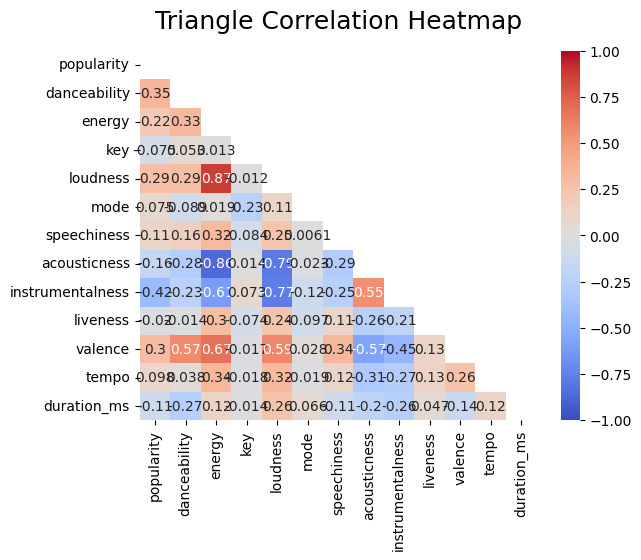

In [68]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

plt.figure()
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.select_dtypes(include=numerics).corr(), dtype=bool))
heatmap = sns.heatmap(df.select_dtypes(include=numerics).corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e